<a href="https://colab.research.google.com/github/OispovIA/masters_thesis/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as models
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.linalg as la

In [ ]:
data = pd.read_csv('data.csv', sep = ';', index_col = 'Unnamed: 0', encoding = 'cp1251')

In [ ]:
data.size

2115072

In [ ]:
desc = data.drop(['param_y', 'PORO', 'SW', 'KRW',  'system_number', 'rotation_angle'], axis = 1).rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'}).describe()

#desc.style.format(precision=3)

desc.style.format(precision=0, 
                formatter={'PERMX': "{:.3f}",
                           'КИН (100)': "{:.3f}",
                           'NTG': "{:.3f}"
                          })
data_corr = data.drop(['param_y', 'PORO', 'SW', 'KRW',  'system_number', 'rotation_angle'], axis = 1).rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'}).sample(frac = 1)


In [ ]:
import scipy.stats as stats

stats.shapiro(data['КИН (100)'])

C:\Users\User\anaconda3\envs\ML\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.903101921081543, pvalue=0.0)

In [ ]:
data['system_number'].unique()

array([   1,  101,    9,  901,   12, 1201,   14, 1401,   13, 1301],
      dtype=int64)

In [ ]:
data['l_horiz'].unique()

array([   0, 1000, 1200, 1500, 2000], dtype=int64)

In [ ]:
data['param_x'].unique()

array([100, 200, 300], dtype=int64)

In [ ]:
data['n_frac'].unique()

array([ 1, 10, 12, 15, 20, 24, 30, 40], dtype=int64)

In [ ]:
data['dFrac'].unique()

array([  0, 100,  50], dtype=int64)

In [ ]:
data.sample(frac=1).reset_index(drop=True).drop('param_y', axis = 1).rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'})#,
    #'rotation_angle': 'rot_angle'})

,PORO,SW,KRW,system_number,NTG,RVAR,PERMX,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
0,0.17,0.3,0.15,1201,0.10,250,2.00,1500,200,15,50,50,90,10000,100,0.0671
1,0.17,0.3,0.15,9,0.10,50,1.00,0,300,1,50,300,0,1,0,0.0142
2,0.17,0.3,0.15,13,0.45,500,2.00,1200,300,24,50,50,90,6,50,0.4254
3,0.17,0.3,0.15,12,0.60,500,2.00,2000,300,40,100,300,45,6,50,0.2878
4,0.17,0.3,0.15,1301,0.60,500,0.30,1200,200,12,50,50,45,10000,100,0.0772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124411,0.17,0.3,0.15,14,0.30,1000,0.30,2000,200,40,50,50,45,1,50,0.2568
124412,0.17,0.3,0.15,12,0.45,50,0.05,1500,200,15,50,50,90,1,100,0.0739
124413,0.17,0.3,0.15,13,0.10,250,1.00,1000,200,10,50,50,45,1,100,0.3509
124414,0.17,0.3,0.15,1301,0.60,250,0.05,2000,300,20,50,50,90,10000,100,0.0748


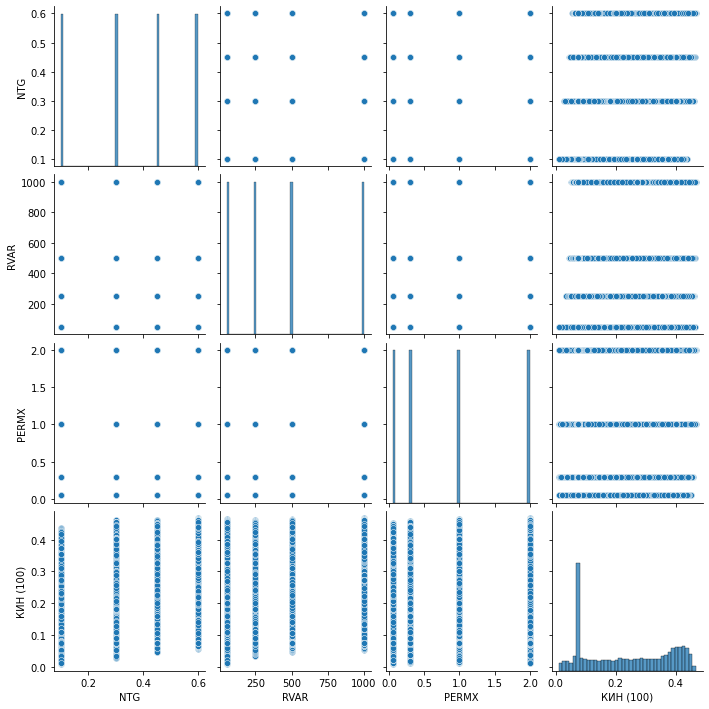

In [ ]:
sns.pairplot(data_corr[['NTG', 'RVAR', 'PERMX', 'КИН (100)']])

g = sns.PairGrid(data_corr[['NTG', 'RVAR', 'PERMX', 'КИН (100)']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot)

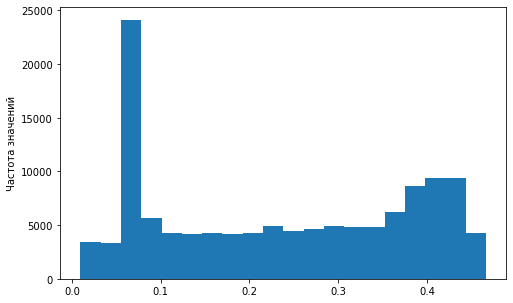

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
fig, ax = plt.subplots()
data['КИН (100)'].plot.hist(bins = 20)
ax.set(xlabel='', ylabel='Частота значений')
plt.show()

In [ ]:
data.rename(columns={'system_number': 'system_num',
                     '@RVAR@': 'Lsand'}, inplace = True)

In [ ]:
data.drop('param_y', axis = 1)#.head()

,PORO,SW,KRW,system_num,@NTG@,Lsand,@PERMX@,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
1,0.17,0.3,0.15,1,0.1,50,0.05,0,100,1,50,50,45,1,0,0.0441
2,0.17,0.3,0.15,1,0.1,50,0.05,0,100,1,50,50,45,3,0,0.0514
3,0.17,0.3,0.15,1,0.1,50,0.05,0,100,1,50,50,45,6,0,0.0559
4,0.17,0.3,0.15,1,0.1,50,0.05,0,100,1,50,50,0,1,0,0.1548
5,0.17,0.3,0.15,1,0.1,50,0.05,0,100,1,50,50,0,3,0,0.1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124412,0.17,0.3,0.15,1301,0.6,1000,2.00,2000,300,20,100,100,45,10000,100,0.0754
124413,0.17,0.3,0.15,1301,0.6,1000,2.00,1000,300,10,150,150,45,10000,100,0.0769
124414,0.17,0.3,0.15,1301,0.6,1000,2.00,1200,300,12,150,150,45,10000,100,0.0766
124415,0.17,0.3,0.15,1301,0.6,1000,2.00,1500,300,15,150,150,45,10000,100,0.0764


In [ ]:
data.sample(frac = 0.1).drop('param_y', axis = 1)

,PORO,SW,KRW,system_num,@NTG@,Lsand,@PERMX@,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
100220,0.17,0.3,0.15,13,0.30,500,0.30,1200,300,24,100,150,90,3,50,0.3328
94159,0.17,0.3,0.15,13,0.10,50,1.00,1500,300,15,50,50,0,1,100,0.0214
103319,0.17,0.3,0.15,13,0.30,500,2.00,2000,200,20,50,50,90,3,100,0.4150
100609,0.17,0.3,0.15,13,0.30,1000,0.30,1000,300,20,100,150,45,1,50,0.3744
112455,0.17,0.3,0.15,13,0.60,500,0.05,2000,300,40,50,150,90,6,50,0.2540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67862,0.17,0.3,0.15,14,0.30,500,1.00,1000,200,20,50,150,45,3,50,0.3970
50815,0.17,0.3,0.15,1201,0.10,250,0.30,1500,200,30,50,50,90,10000,50,0.0658
1927,0.17,0.3,0.15,1,0.10,500,1.00,0,100,1,100,300,45,1,0,0.3871
13047,0.17,0.3,0.15,101,0.45,1000,0.05,0,100,1,100,100,90,10000,0,0.0790


In [ ]:
data_inj = data[data.switch_period != 10000]
data_inj['switch_period'].unique()
data_inj['system_num_cat'] = pd.Categorical(data_inj.system_num)
data_inj['n_frac_cat'] = pd.Categorical(data_inj.n_frac)
data['switch_period_cat'] = pd.Categorical(data.switch_period)
data_inj['dFrac_cat'] = pd.Categorical(data_inj.dFrac)
data_inj['param_x_cat'] = pd.Categorical(data_inj.param_x)

C:\Users\User\AppData\Local\Temp\ipykernel_34396\2858801405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['system_num_cat'] = pd.Categorical(data_inj.system_num)
C:\Users\User\AppData\Local\Temp\ipykernel_34396\2858801405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['n_frac_cat'] = pd.Categorical(data_inj.n_frac)
C:\Users\User\AppData\Local\Temp\ipykernel_34396\2858801405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
corr = abs(data.rename(columns={
    '@NTG@': 'NTG',
    '@RVAR@': 'RVAR',
    '@PERMX@': 'PERMX'}).drop(['param_y', 'PORO', 'SW', 'KRW', 'system_num', 'rotation_angle'], axis = 1).corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\User\AppData\Local\Temp\ipykernel_34396\1242599016.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,NTG,Lsand,PERMX,l_horiz,param_x,n_frac,xf_prod,xf_inj,switch_period,dFrac,КИН (100)
NTG,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.311
Lsand,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.228
PERMX,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.294
l_horiz,0.000,0.000,0.000,1.000,0.213,0.801,0.230,0.198,0.067,0.698,0.255
param_x,0.000,0.000,0.000,0.213,1.000,0.247,0.147,0.072,0.081,0.127,0.128
n_frac,0.000,0.000,0.000,0.801,0.247,1.000,0.112,0.185,0.085,0.219,0.245
xf_prod,0.000,0.000,0.000,0.230,0.147,0.112,1.000,0.258,0.111,0.289,0.014
xf_inj,0.000,0.000,0.000,0.198,0.072,0.185,0.258,1.000,0.339,0.162,0.268
switch_period,0.000,0.000,0.000,0.067,0.081,0.085,0.111,0.339,1.000,0.032,0.569
dFrac,0.000,0.000,0.000,0.698,0.127,0.219,0.289,0.162,0.032,1.000,0.160


In [ ]:
data_top_kin = data.sort_values(by=['КИН (100)'], ascending = False).drop(['PORO', 'SW', 'KRW'], axis = 1)[:10000]

In [ ]:
data['system_num'].unique()

array([   1,  101,    9,  901,   12, 1201,   14, 1401,   13, 1301],
      dtype=int64)

In [ ]:
data.drop(['param_y', 'PORO', 'SW', 'KRW'], axis = 1).groupby(['system_num']).agg('mean')

,@NTG@,Lsand,@PERMX@,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100)
system_num,,,,,,,,,,,,
1,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,45.000000,3.333333,0.000000,0.335427
9,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,22.500000,3.333333,0.000000,0.354925
12,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.192229
13,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.310726
14,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.273198
101,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,45.000000,10000.000000,0.000000,0.074698
901,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,22.500000,10000.000000,0.000000,0.074499
1201,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,60.000000,10000.000000,77.777778,0.069749
1301,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,60.000000,10000.000000,77.777778,0.072555


In [ ]:
data.groupby(['system_num']).agg(lambda x:x.value_counts().sum())

,PORO,SW,KRW,@NTG@,Lsand,@PERMX@,l_horiz,param_x,param_y,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100),switch_period_cat
system_num,,,,,,,,,,,,,,,,,
1,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096,12096
9,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064
12,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880
13,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880
14,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880,26880
101,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
901,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152
1201,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912
1301,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912,6912


In [ ]:
data.groupby(['switch_period']).agg(lambda x:x.value_counts().index[0])

,PORO,SW,KRW,system_num,@NTG@,Lsand,@PERMX@,l_horiz,param_x,param_y,n_frac,xf_prod,xf_inj,rotation_angle,dFrac,КИН (100),switch_period_cat
switch_period,,,,,,,,,,,,,,,,,
1,0.17,0.3,0.15,12,0.1,50,0.05,0,300,1200,1,50,150,45,100,0.4133,1
3,0.17,0.3,0.15,12,0.1,50,0.05,0,300,1200,1,50,150,45,100,0.3974,3
6,0.17,0.3,0.15,12,0.1,50,0.05,0,300,1200,1,50,150,45,100,0.3840,6
10000,0.17,0.3,0.15,1201,0.1,50,0.05,1000,300,1200,20,50,50,45,100,0.0744,10000


In [ ]:
data['geom'] = data['@NTG@'] * data['Lsand']
data['geol'] = data['geom'] * data['@PERMX@']
data_inj['geom'] = data_inj['@NTG@'] * data_inj['Lsand']
data_inj['geol'] = data_inj['geom'] * data_inj['@PERMX@']

C:\Users\User\AppData\Local\Temp\ipykernel_34396\191451349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['geom'] = data_inj['@NTG@'] * data_inj['Lsand']
C:\Users\User\AppData\Local\Temp\ipykernel_34396\191451349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inj['geol'] = data_inj['geom'] * data_inj['@PERMX@']


In [ ]:
data_inj['system_num_cat'].unique()

[1, 9, 12, 14, 13]
Categories (5, int64): [1, 9, 12, 13, 14]

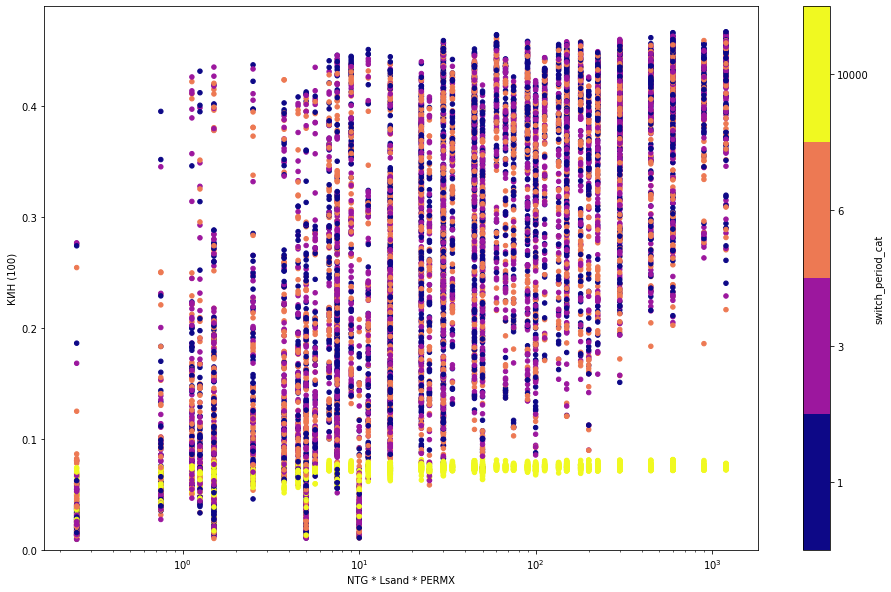

In [ ]:
ax = data.sample(frac = 0.1).plot.scatter(
                                    y = 'КИН (100)', 
                                    x = 'geol', 
                                    logx = True, 
                                    c = 'switch_period_cat', 
                                    figsize = (16,10), 
                                    cmap="plasma", sharex=False,
                                          xlabel='NTG * Lsand * PERMX'
                                    )
ax.set_ylim(bottom = 0)
plt.show()

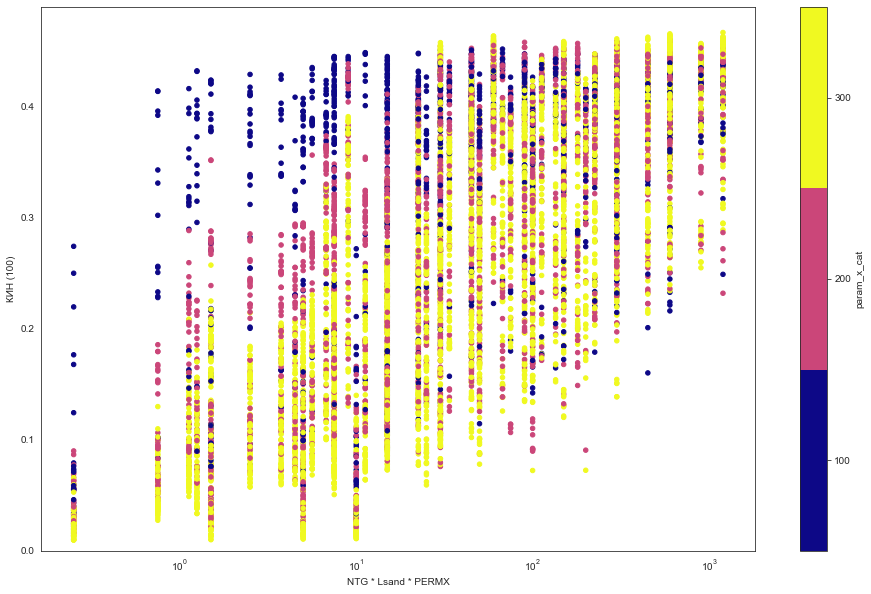

In [ ]:
ax = data_inj.sample(frac = 0.1).plot.scatter(
                                          y = 'КИН (100)',
                                          x = 'geol',
                                          logx = True,
                                          c = 'param_x_cat',
                                          figsize = (16,10),
                                          cmap="plasma",
                                          sharex=False,
                                          xlabel='NTG * Lsand * PERMX'
                                         )
ax.set_ylim(bottom = 0)
plt.show()

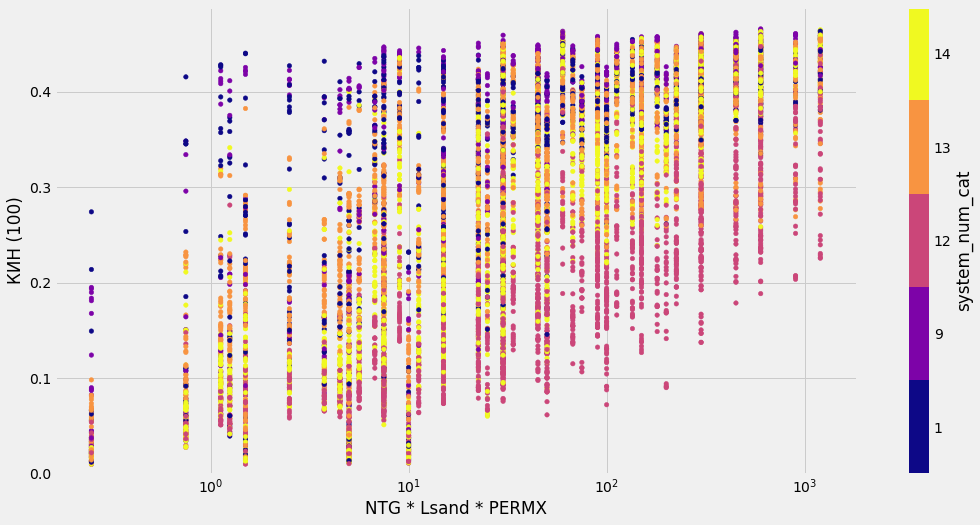

In [ ]:
with plt.style.context('fivethirtyeight'):
    ax = data_inj.sample(frac = 0.1).plot.scatter(
                                          y = 'КИН (100)',
                                          x = 'geol',
                                          logx = True,
                                          c = 'system_num_cat',
                                          figsize = (16,8),
                                          cmap="plasma",
                                          sharex=False,
                                          xlabel='NTG * Lsand * PERMX'
                                          )
    ax.set_ylim(bottom = 0)
    plt.show()

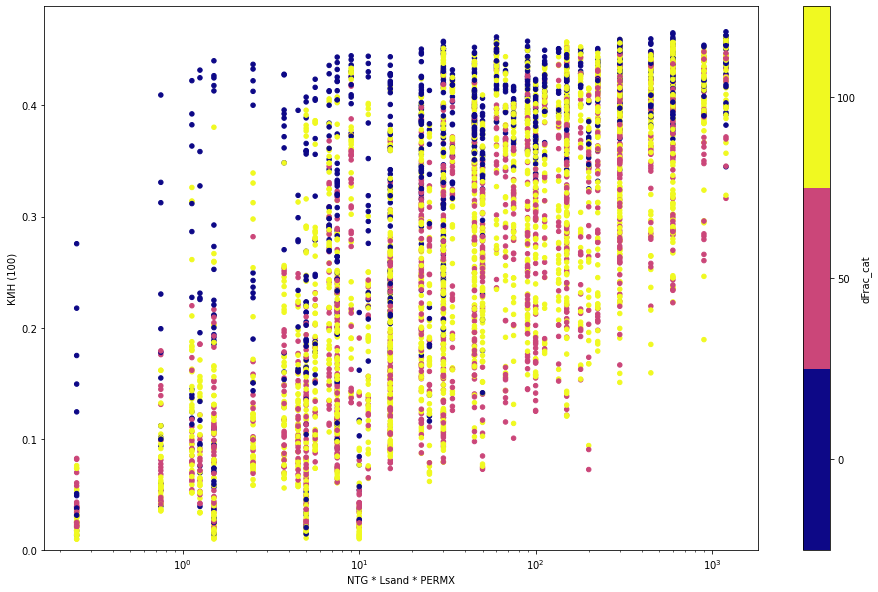

In [ ]:
ax = data_inj.sample(frac = 0.05).plot.scatter(
                                          y = 'КИН (100)',
                                          x = 'geol',
                                          logx = True,
                                          c = 'dFrac_cat',
                                          figsize = (16,10),
                                          cmap="plasma",
                                          sharex=False,
                                          xlabel='NTG * Lsand * PERMX'
                                         )
ax.set_ylim(bottom = 0)
plt.show()

In [ ]:
data['geol']

1            0.25
2            0.25
3            0.25
4            0.25
5            0.25
           ...   
124412    1200.00
124413    1200.00
124414    1200.00
124415    1200.00
124416    1200.00
Name: geol, Length: 124416, dtype: float64

In [ ]:
data.drop(['param_y', 'PORO', 'SW', 'KRW'], axis = 1).groupby(['system_num']).agg('mean')

,@NTG@,Lsand,@PERMX@,l_horiz,param_x,n_frac,xf_prod,xf_inj,rotation_angle,switch_period,dFrac,КИН (100),geom,geol
system_num,,,,,,,,,,,,,,
1,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,45.000000,3.333333,0.000000,0.335427,163.125,136.617188
9,0.3625,450.0,0.8375,0.0,200.000000,1.000000,92.857143,200.000000,22.500000,3.333333,0.000000,0.354925,163.125,136.617188
12,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.192229,163.125,136.617188
13,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.310726,163.125,136.617188
14,0.3625,450.0,0.8375,1425.0,251.428571,19.542857,67.142857,148.571429,43.714286,3.333333,81.428571,0.273198,163.125,136.617188
101,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,45.000000,10000.000000,0.000000,0.074698,163.125,136.617188
901,0.3625,450.0,0.8375,0.0,200.000000,1.000000,100.000000,100.000000,22.500000,10000.000000,0.000000,0.074499,163.125,136.617188
1201,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,60.000000,10000.000000,77.777778,0.069749,163.125,136.617188
1301,0.3625,450.0,0.8375,1425.0,229.629630,20.583333,79.629630,79.629630,60.000000,10000.000000,77.777778,0.072555,163.125,136.617188


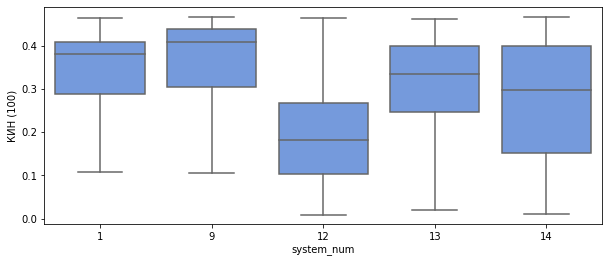

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,4
ax = sns.boxplot(x='system_num', y='КИН (100)', data=data_inj, color = 'cornflowerblue', showfliers=False)

plt.show()

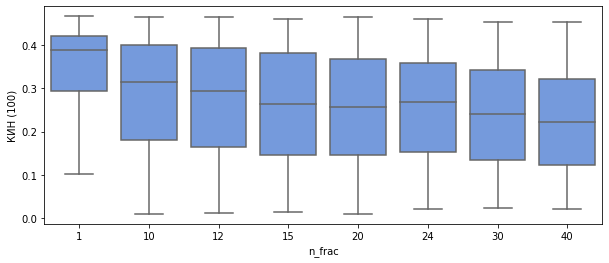

In [ ]:
ax = sns.boxplot(x='n_frac', y='КИН (100)', data=data_inj, color = 'cornflowerblue', showfliers=False)

plt.show()

In [ ]:
data_hor_syst = data_inj[data_inj.system_num >= 12]
data_hor_syst.shape

(80640, 23)

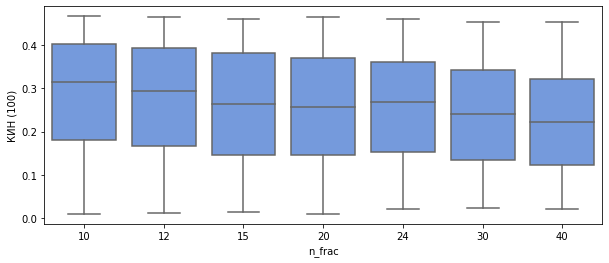

In [ ]:
ax = sns.boxplot(x='n_frac', y='КИН (100)', data=data_hor_syst, color = 'cornflowerblue', showfliers=False)

plt.show()

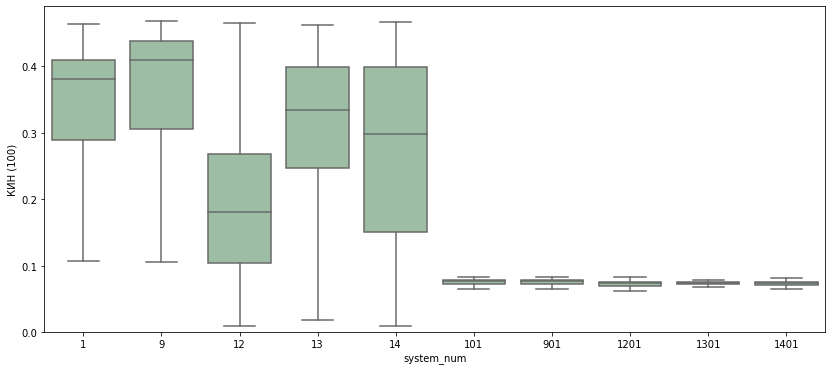

In [ ]:
#sns.set(rc={'figure.figsize':(14,6)})


# figure size in inches
rcParams['figure.figsize'] = 14,6

ax = sns.boxplot(x='system_num', y='КИН (100)', data=data, color='#99c2a2', showfliers=False)
ax.set_ylim(bottom = 0)
#ax = sns.swarmplot(x="system_num", y="КИН (100)", data=data.sample(frac = 0.01), color='#7d0013')
plt.show()

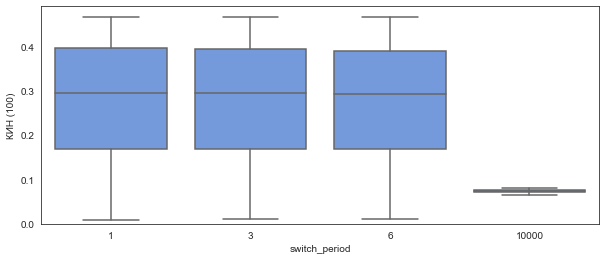

In [ ]:
rcParams['figure.figsize'] = 10,4
sns.set_style("white")
ax = sns.boxplot(x='switch_period', y='КИН (100)', data=data, color = 'cornflowerblue', showfliers=False)
ax.set_ylim(bottom = 0)
#ax = sns.swarmplot(x="system_num", y="КИН (100)", data=data.sample(frac = 0.01), color='#7d0013')
plt.show()

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['switch_period'] == 1],
               data['КИН (100)'][data['switch_period'] == 3],
               data['КИН (100)'][data['switch_period'] == 6],
               data['КИН (100)'][data['switch_period'] == 10000]
              )

F_onewayResult(statistic=19837.535455315785, pvalue=0.0)

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['switch_period'] == 1],
               data['КИН (100)'][data['switch_period'] == 3]
                )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['switch_period'] == 3],
               data['КИН (100)'][data['switch_period'] == 6]
                )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['switch_period'] == 1],
               data['КИН (100)'][data['switch_period'] == 6]
                )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['system_num'] == 1],
               data['КИН (100)'][data['system_num'] == 9],
               data['КИН (100)'][data['system_num'] == 12],
               data['КИН (100)'][data['system_num'] == 13],
               data['КИН (100)'][data['system_num'] == 14]
              )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['system_num'] == 1],
               data['КИН (100)'][data['system_num'] == 9],
              )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['rotation_angle'] == 0],
               data['КИН (100)'][data['rotation_angle'] == 90],
              )

In [ ]:
models.f_oneway(
               data['КИН (100)'][data['xf_prod'] == 50],
               data['КИН (100)'][data['xf_prod'] == 100],
               data['КИН (100)'][data['xf_prod'] == 150]
              )